In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.plugin_event_accumulator import EventAccumulator
import glob
import numpy as np

In [7]:
input_root = 'outputs/multirun/main_all/supervised/income/input/2022-06-29/15-33-18/**/events*'
model_root = 'outputs/multirun/main_all/supervised/income/model/2022-06-29/15-33-23/**/events*'

In [8]:
def get_results(root):
    path = glob.glob(root)
    path.sort()
    path = path[:]
    results = [[] for _ in range(16)]
    for p in path:
        ea = EventAccumulator(p)
        ea.Reload()
        # acc
        tag = ea.Tags()['tensors'][-1]
        for i, t in enumerate(ea.Tensors(tag)):
            results[i] += [t.tensor_proto.float_val[0]]
    return results

In [19]:
def show_box(results, title):
    # 箱ひげ図
    plt.figure(figsize=(40, 60))
    fig, ax = plt.subplots()

    bp = ax.boxplot(results)#, whis=np.inf)
    ax.set_xticklabels(list(range(16)))

    m = np.mean(results[0])
    plt.plot([0, 17], [m, m])

    plt.title(title)
    plt.xlabel('augment number')
    plt.ylabel('acc')
    # Y軸のメモリのrange
    plt.ylim([85.0, 86.5])
    plt.xlim([0, 17])
    plt.grid()

    # 描画
    plt.show()
    # plt.savefig(f'outputs/results/{title}.png', format="png", dpi=100)
    plt.close()


10 10


<Figure size 2880x4320 with 0 Axes>

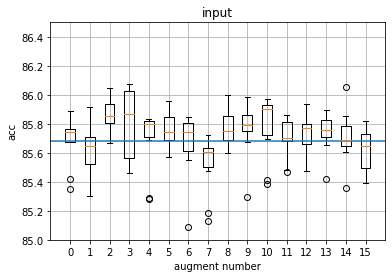

<Figure size 2880x4320 with 0 Axes>

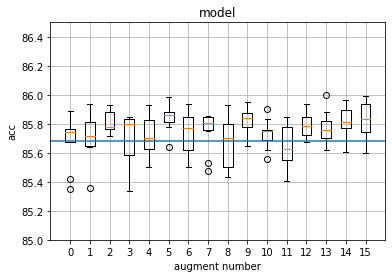

In [20]:
results_input = get_results(input_root)
results_model = get_results(model_root)
print(len(results_input[0]), len(results_model[0]))
show_box(results_input, 'input')
show_box(results_model, 'model')